Filtering the data and inspecting the distributions of the product column that will be used as a classifier for the consumer complaint narrative.

##loading the data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r'C:\Users\91745\Desktop\US\consumer_complaints.csv')
print(df.info())
data = df[df['consumer_complaint_narrative'].isnull()==False]


C:\Users\91745\AppData\Local\Temp\ipykernel_18836\2510683248.py:5: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\91745\Desktop\US\consumer_complaints.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [3]:
data.isnull().sum()

date_received                       0
product                             0
sub_product                     20455
issue                               0
sub_issue                       33874
consumer_complaint_narrative        0
company_public_response         34030
company                             0
state                             186
zipcode                           189
tags                            55389
consumer_consent_provided           0
submitted_via                       0
date_sent_to_company                0
company_response_to_consumer        0
timely_response                     0
consumer_disputed?                  0
complaint_id                        0
dtype: int64

In [4]:
data

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553084,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,"XXXX XXXX is reporting incorrectly, payments h...",Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1782682
553085,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,Reflecting incorrect payment status. Have been...,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1781861
553086,02/11/2016,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,NaN,Zarvad III S.A.,NV,891XX,Servicemember,Consent provided,Web,02/11/2016,Closed with explanation,Yes,No,1782804
553090,03/30/2016,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I recently became aware that Amerisave Mortgag...,Company believes it acted appropriately as aut...,Amerisave,AZ,853XX,NaN,Consent provided,Web,03/30/2016,Closed with explanation,Yes,Yes,1855199


In [5]:
data

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553084,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,"XXXX XXXX is reporting incorrectly, payments h...",Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1782682
553085,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,Reflecting incorrect payment status. Have been...,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1781861
553086,02/11/2016,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,NaN,Zarvad III S.A.,NV,891XX,Servicemember,Consent provided,Web,02/11/2016,Closed with explanation,Yes,No,1782804
553090,03/30/2016,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I recently became aware that Amerisave Mortgag...,Company believes it acted appropriately as aut...,Amerisave,AZ,853XX,NaN,Consent provided,Web,03/30/2016,Closed with explanation,Yes,Yes,1855199


In [6]:
product_distribution = data.groupby('product').count()

In [7]:
product_distribution.tail()

,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
product,,,,,,,,,,,,,,,,,
Mortgage,14919,14919,14919,0,14919,7176,14919,14899,14899,2873,14919,14919,14919,14919,14919,14919,14919
Other financial service,110,110,110,0,110,50,110,110,110,27,110,110,110,110,110,110,110
Payday loan,726,726,726,726,726,287,726,726,726,148,726,726,726,726,726,726,726
Prepaid card,861,861,861,0,861,206,861,861,861,86,861,861,861,861,861,861,861
Student loan,2128,2128,2128,2128,2128,616,2128,2122,2122,163,2128,2128,2128,2128,2128,2128,2128


In [8]:
product_distribution = data.groupby('product').count().reset_index()

In [9]:
product_distribution

,product,date_received,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,Bank account or service,5711,5711,5711,0,5711,3312,5711,5660,5660,900,5711,5711,5711,5711,5711,5711,5711
1,Consumer Loan,3678,3678,3678,0,3678,1587,3678,3675,3675,653,3678,3678,3678,3678,3678,3678,3678
2,Credit card,7929,0,7929,0,7929,3733,7929,7904,7904,1242,7929,7929,7929,7929,7929,7929,7929
3,Credit reporting,12526,0,12526,12526,12526,7832,12526,12500,12500,2094,12526,12526,12526,12526,12526,12526,12526
4,Debt collection,17552,17552,17552,17552,17552,7791,17552,17516,17513,3114,17552,17552,17552,17552,17552,17552,17552
5,Money transfers,666,666,666,0,666,186,666,647,647,117,666,666,666,666,666,666,666
6,Mortgage,14919,14919,14919,0,14919,7176,14919,14899,14899,2873,14919,14919,14919,14919,14919,14919,14919
7,Other financial service,110,110,110,0,110,50,110,110,110,27,110,110,110,110,110,110,110
8,Payday loan,726,726,726,726,726,287,726,726,726,148,726,726,726,726,726,726,726
9,Prepaid card,861,861,861,0,861,206,861,861,861,86,861,861,861,861,861,861,861


In [10]:
product_distribution['product']

0     Bank account or service
1               Consumer Loan
2                 Credit card
3            Credit reporting
4             Debt collection
5             Money transfers
6                    Mortgage
7     Other financial service
8                 Payday loan
9                Prepaid card
10               Student loan
Name: product, dtype: object

Text(0, 0.5, 'Product')

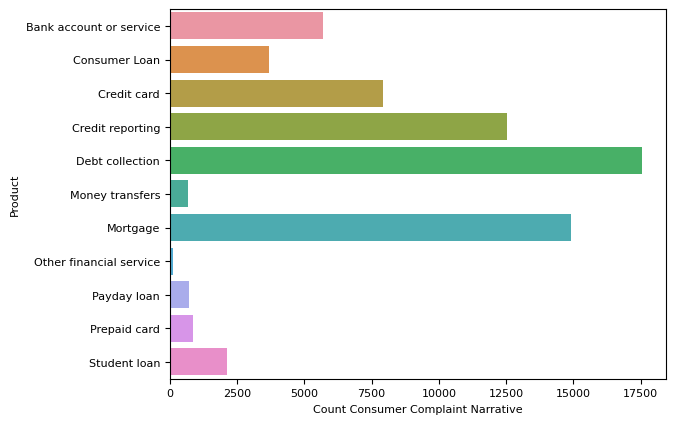

In [11]:
 
#product_distribution = data.groupby('product').count().reset_index()
plt.rcParams.update({'font.size':8})
sns.barplot(x=product_distribution['consumer_complaint_narrative'], y=product_distribution['product'])
plt.xlabel('Count Consumer Complaint Narrative')
plt.ylabel('Product')

Cleaning and tokenizing the text data.

In [12]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re

stop_words = STOP_WORDS
text = data['consumer_complaint_narrative'].values
text_no_punc = [re.sub(r'[^\w\s]','',t) for t in text]
text_cleaned = [t.strip().lower() for t in text_no_punc]

def spacy_tokenizer(t):
    token = [word for word in t.split() if word not in stop_words]
    return token

text_tokened = [spacy_tokenizer(t) for t in text_cleaned]
text_processed = [','.join(t).replace(',',' ') for t in text_tokened]

print(text_processed[0])  

xxxx claimed owe 2700 xxxx years despite proof payment sent canceled check ownpaid invoice 2700 continue insist owe collection agencies stop harassment bill paid years ago
